# **Installing Recuired Packages**

In [ ]:
!pip install python-igraph==0.9.11
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install dgl
!pip install umap-learn
!pip  install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.2/485.2 kB 513.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=50af46c9ec18c96e35e7b918bb6a7e0161f75aca2d560f6823ae99a2a052f926
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric
     ━━━

# **Importing Packages**

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense,Lambda
from keras.models import Model
from keras import backend as K
import time
from sklearn import metrics
from tensorflow.python.framework.ops import disable_eager_execution
import igraph as ig
from sklearn.neighbors import kneighbors_graph
import cairocffi
from igraph import Graph, Plot
from IPython.display import Image
from igraph.drawing.text import TextDrawer
from igraph import intersection
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
import networkx as nx
from tensorflow.keras.utils import plot_model
disable_eager_execution()


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# **Input, Noramlizing & Visulizing Data**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/omics_data.zip'

extracted_folder_path = 'data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
# Listing all the files in the extracted folder
file_list = []
for root, dirs, files in os.walk(extracted_folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_list.append(file_path)
file_list

['data/log_mirna_omics.txt', 'data/methy_omics.txt', 'data/log_exp_omics.txt']

In [ ]:
rm -r data/.ipynb_checkpoints

In [ ]:
omic1 = pd.read_csv('data/log_exp_omics.txt', sep = '\t').T
omic2 = pd.read_csv('data/log_mirna_omics.txt', sep = '\t').T
omic3 = pd.read_csv('data/methy_omics.txt', sep = '\t').T

Ids = pd.DataFrame(omic1.index)


In [ ]:
omic1

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
TCGA.3C.AALI.01,3.359788,0.000000,9.470735,3.841852,8.816027,2.264957,4.949890,7.897146,2.419593,5.183697,...,9.127880,4.975048,2.419593,2.091734,4.284536,3.012408,6.841076,9.916176,7.640081,9.857344
TCGA.3C.AALJ.01,3.657960,0.931002,8.617134,0.000000,10.105430,0.000000,4.564713,8.728725,0.000000,1.895264,...,8.753697,1.895264,0.000000,6.893124,6.825540,5.561861,7.503166,11.306220,8.378608,5.184205
TCGA.3C.AALK.01,3.710327,0.000000,8.842369,0.000000,8.669908,5.160025,5.786581,7.585096,1.408658,0.000000,...,9.164968,1.164271,1.408658,3.336598,2.849199,4.780263,6.762500,9.387150,7.462904,6.079197
TCGA.4H.AAAK.01,2.972104,0.511468,8.814940,3.102910,6.550993,1.645102,5.771278,8.076179,2.138913,0.511468,...,8.168965,0.000000,0.000000,3.431249,5.327289,3.431249,5.960618,9.399744,3.910982,7.556383
TCGA.5L.AAT0.01,2.318722,0.665938,7.721109,0.000000,7.647046,1.119821,5.105846,7.677873,1.119821,0.000000,...,8.402129,0.000000,0.000000,3.797542,5.055838,2.650627,5.780491,8.790208,4.073657,6.427212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.WT.AB44.01,0.000000,1.394514,8.293551,0.000000,10.573753,1.783876,4.758298,8.883514,2.909965,0.000000,...,8.889795,0.859572,4.178276,1.394514,6.100206,0.859572,4.842622,7.506356,6.637412,9.503634
TCGA.XX.A899.01,3.943528,0.478920,9.369022,5.187178,9.040538,0.837863,4.689472,7.808774,0.478920,0.478920,...,6.736522,0.837863,0.837863,1.569734,0.478920,3.885526,6.535000,8.839477,4.476369,6.635540
TCGA.XX.A89A.01,4.543743,1.530820,8.543901,6.220727,8.969347,2.392675,5.687710,8.000758,5.826276,0.000000,...,8.182696,3.248322,0.000000,1.530820,3.923244,5.941644,6.089076,9.441655,7.369672,7.884100
TCGA.Z7.A8R5.01,1.706553,0.675635,6.861489,1.481299,8.122843,3.316117,4.890996,8.783137,1.760987,0.000000,...,8.878026,1.133958,0.000000,1.481299,5.029360,0.675635,6.372127,8.020362,5.727014,7.906453


<ipython-input-7-824486f51e86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(omic1.mean(axis = 1), bins = 100)


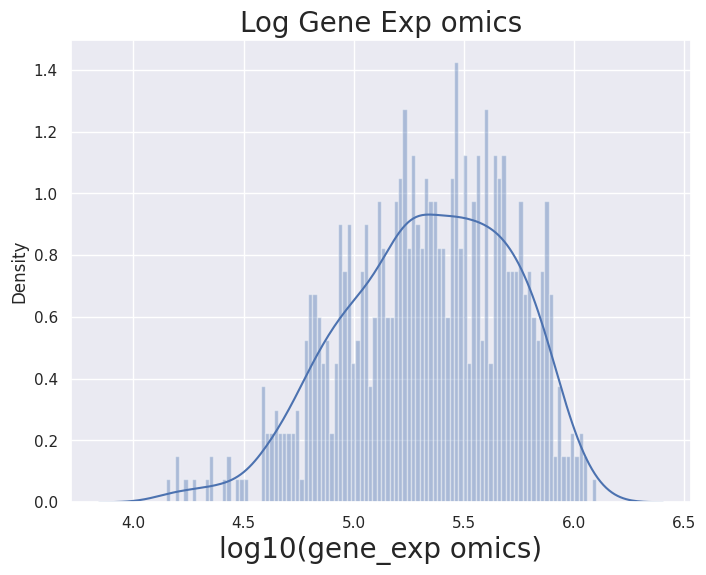

In [ ]:
sns.set(rc = {'figure.figsize':(8, 6)}, font_scale = 1)
sns.distplot(omic1.mean(axis = 1), bins = 100)
plt.title('Log Gene Exp omics', fontsize = 20)
plt.xlabel('log10(gene_exp omics)', fontsize = 20)
plt.show();

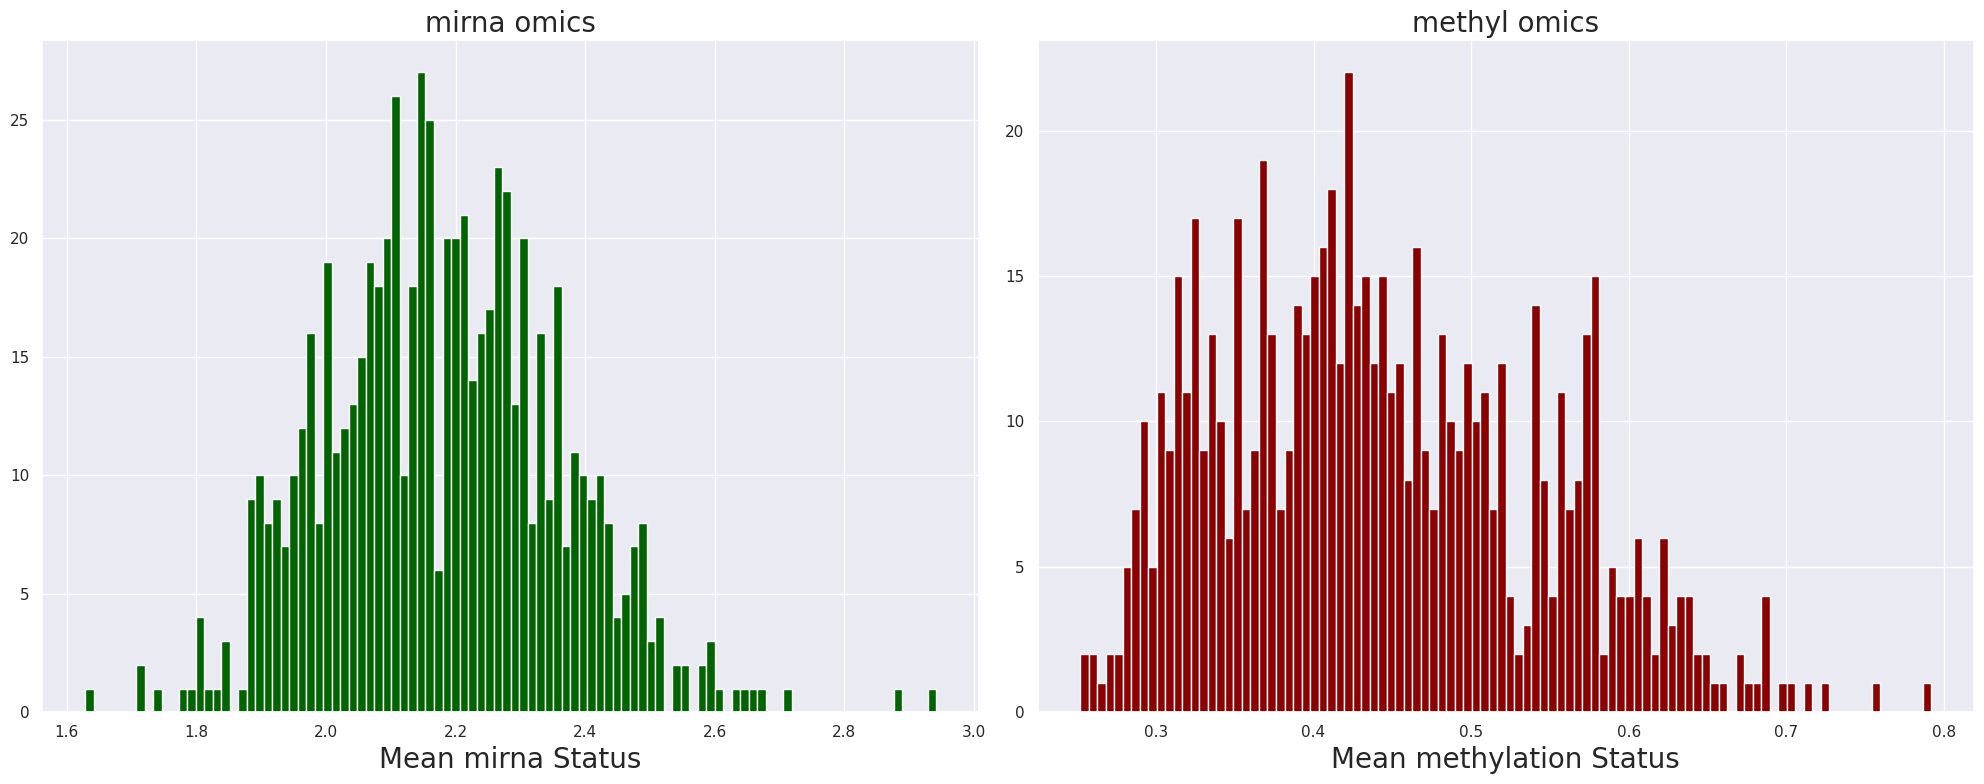

In [ ]:
figure = plt.figure(figsize = (20, 8))
plt.subplot(121)
plt.hist(omic2.mean(axis = 1), bins = 100, color = 'darkgreen')
plt.title('mirna omics', fontsize = 20)
plt.xlabel('Mean mirna Status', fontsize = 20)
plt.subplot(122)
plt.hist(omic3.mean(axis = 1), bins = 100, color = 'darkred')
plt.title('methyl omics', fontsize = 20)
plt.xlabel('Mean methylation Status', fontsize = 20)
figure.tight_layout()
plt.show()

# **Variational AutoEncoder on MultiOmic Data**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K

'''This code defines a class VAE for the Variational Autoencoder model.
It initializes the input and latent dimensions and sets initial values for the encoder, decoder, and VAE models.
The build_model method is defined within the class to construct the encoder, decoder, and VAE models.
The encoder consists of input and hidden layers, followed by mean and log-variance layers representing the parameters of the latent space.
These layers are connected sequentially. The decoder is similarly constructed, taking the latent space as input and producing the output layer.'''

class VAE:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.encoder = None
        self.decoder = None
        self.vae = None

    def build_model(self):
        # Encoder model
        input_layer = Input(shape=(self.input_dim,))
        hidden_layer = Dense(512, activation='relu')(input_layer)
        z_mean = Dense(self.latent_dim)(hidden_layer)
        z_log_var = Dense(self.latent_dim)(hidden_layer)

        def sampling(args):

            '''sampling function to generate a sample from the latent space based on the mean and log-variance obtained from the encoder.
            It uses the Keras backend (K) to perform the random sampling. The z variable represents the sampled latent space.
            The encoder, decoder, and vae models are defined using the functional API of Keras. The encoder takes the input layer and outputs the mean, log-variance, and sampled latent space.
            The decoder takes the latent space as input and produces the output layer. The VAE model connects the encoder and decoder.'''

            z_mean, z_log_var = args
            epsilon = K.random_normal(shape=(K.shape(z_mean)[0], self.latent_dim), mean=0., stddev=1.)
            return z_mean + K.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling)([z_mean, z_log_var])

        self.encoder = Model(input_layer, [z_mean, z_log_var, z], name='encoder')

        # Decoder model
        latent_input = Input(shape=(self.latent_dim,))
        hidden_layer = Dense(512, activation='relu')(latent_input)
        output_layer = Dense(self.input_dim, activation='sigmoid')(hidden_layer)

        self.decoder = Model(latent_input, output_layer, name='decoder')

        # VAE model
        output_layer = self.decoder(self.encoder(input_layer)[2])
        self.vae = Model(input_layer, output_layer, name='vae')

    def vae_loss(self, x, x_decoded_mean):

        '''This code defines the loss function for the VAE model. The loss function consists of two components:
        the reconstruction loss, which measures the difference between the input and the output of the VAE, and the KL divergence loss,
        which encourages the distribution of the latent space to match a prior distribution (typically a standard normal distribution).
        The total loss is the sum of the reconstruction loss and the KL divergence loss.'''

        # Reconstruction loss
        reconstruction_loss = mse(x, x_decoded_mean)

        # KL divergence loss
        kl_loss = -0.5 * K.sum(1 + self.encoder.outputs[1] - K.square(self.encoder.outputs[0]) - K.exp(self.encoder.outputs[1]), axis=-1)

        # Total loss
        vae_loss = K.mean(reconstruction_loss + kl_loss)
        return vae_loss

    def train(self, x_train, epochs, batch_size):
        self.vae.compile(optimizer='adam', loss=self.vae_loss)
        self.vae.fit(x_train, x_train, epochs=epochs, batch_size=batch_size)


    def predict(self, x_test):
        return self.vae.predict(x_test)


# Defining the paths
data_folder = 'data'
results_folder = 'results'
os.makedirs(results_folder, exist_ok=True)
# Get the list of files in the data folder
file_names = os.listdir(data_folder)

# Iterate over the files
for file_name in file_names:
    # Load the input data from the file
    file_path = os.path.join(data_folder, file_name)
    input_data = pd.read_csv(file_path, sep='\t')
    x_train = np.array(input_data)

    # Set the input_dim based on the number of columns in the input data
    input_dim = x_train.shape[1]

    # Create an instance of the VAE model
    vae = VAE(input_dim, 32)

    # Build the VAE model
    vae.build_model()

    try:
        # Train the VAE model
        epochs = 64
        batch_size = 32
        vae.train(x_train, epochs, batch_size)


        # Predict using the trained model
        decoded_inputs = vae.predict(x_train)

        # Save the encoded inputs to a file
        os.makedirs(results_folder, exist_ok=True)
        result_file = os.path.join(results_folder, file_name)
        np.savetxt(result_file, decoded_inputs, delimiter='\t')

        # Print the decoded inputs (optional)
        print(decoded_inputs)

    except RecursionError:
        print("RecursionError occurred for file:", file_name)
        continue


Train on 6000 samples
Epoch 1/64
6000/6000 [==============================] - 7s 1ms/sample - loss: 848080779.7921
Epoch 2/64
6000/6000 [==============================] - 1s 98us/sample - loss: 87.4138
Epoch 3/64
6000/6000 [==============================] - 1s 96us/sample - loss: 62.9732
Epoch 4/64
6000/6000 [==============================] - 1s 97us/sample - loss: 54.8667
Epoch 5/64
6000/6000 [==============================] - 1s 100us/sample - loss: 51.7614
Epoch 6/64
6000/6000 [==============================] - 1s 98us/sample - loss: 49.6492
Epoch 7/64
6000/6000 [==============================] - 1s 97us/sample - loss: 48.9139
Epoch 8/64
6000/6000 [==============================] - 1s 100us/sample - loss: 46.9345
Epoch 9/64
6000/6000 [==============================] - 1s 101us/sample - loss: 46.2942
Epoch 10/64
6000/6000 [==============================] - 1s 96us/sample - loss: 44.4582
Epoch 11/64
6000/6000 [==============================] - 1s 127us/sample - loss: 43.4674
Epoch 12/

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[1.         0.9999999  0.9999999  ... 0.9999999  0.9999999  0.99999976]
 [0.9999999  0.9999999  1.         ... 0.99999976 1.         0.99999976]
 [1.         1.         0.9999999  ... 0.9999999  0.9999999  0.9999999 ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.9999999  0.9999999  0.9999999  ... 0.9999999  0.9999999  0.99999964]
 [1.         0.9999999  1.         ... 1.         1.         0.9999999 ]]
Train on 5000 samples
Epoch 1/64
5000/5000 [==============================] - 1s 148us/sample - loss: 0.2851
Epoch 2/64
5000/5000 [==============================] - 0s 96us/sample - loss: 0.0807
Epoch 3/64
5000/5000 [==============================] - 0s 97us/sample - loss: 0.0800
Epoch 4/64
5000/5000 [==============================] - 0s 99us/sample - loss: 0.0798
Epoch 5/64
5000/5000 [==============================] - 1s 103us/sample - loss: 0.0796
Epoch 6/64
5000/5000 [==============================] - 1s 129us/sample - loss: 0.0796
Epoch 7/64
5000

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[0.457197   0.5540217  0.56229514 ... 0.34599915 0.43311617 0.35980985]
 [0.44782516 0.55119663 0.5618729  ... 0.33968842 0.43852192 0.35046956]
 [0.45447978 0.54261136 0.5608535  ... 0.35048303 0.44645214 0.3714182 ]
 ...
 [0.4471014  0.5559088  0.56921756 ... 0.33742765 0.440205   0.3560803 ]
 [0.45825574 0.5442697  0.5535449  ... 0.34809703 0.4397442  0.36648187]
 [0.4538739  0.53855383 0.5560624  ... 0.35167348 0.43674353 0.36180112]]


IsADirectoryError: ignored

# **Applying KNN_Graph to Encoded Data**

##Encoded data

In [ ]:
exp_omics = pd.read_csv('results/log_exp_omics.txt', sep = '\t', header=None).T
exp_omics.set_index(omic1.index, inplace=True)
print('Dimensions of gene_exp data set: ' + str(exp_omics.shape))
mirna_omics = pd.read_csv('results/log_mirna_omics.txt', sep = '\t', header=None).T
mirna_omics.set_index(omic1.index, inplace=True)
print('Dimensions of mirna_exp data set: ' + str(mirna_omics.shape))
methy_omics = pd.read_csv('results/methy_omics.txt', sep = '\t', header=None).T
methy_omics.set_index(omic1.index, inplace=True)
print('Dimensions of Methylation data set: ' + str(methy_omics.shape))

Dimensions of gene_exp data set: (684, 6000)
Dimensions of mirna_exp data set: (684, 892)
Dimensions of Methylation data set: (684, 5000)


In [ ]:
survival_data = pd.read_excel('survival.xlsx')

In [ ]:
n_neighbor = 30
patient_ids = omic1.index

knn_exp_omics = kneighbors_graph(exp_omics.values, n_neighbor, metric = 'euclidean', mode = 'connectivity').toarray()
knn_exp_omics = pd.DataFrame(knn_exp_omics, columns = omic1.index, index = omic1.index)
knn_exp_omics

,TCGA.3C.AALI.01,TCGA.3C.AALJ.01,TCGA.3C.AALK.01,TCGA.4H.AAAK.01,TCGA.5L.AAT0.01,TCGA.5L.AAT1.01,TCGA.5T.A9QA.01,TCGA.A1.A0SB.01,TCGA.A1.A0SF.01,TCGA.A1.A0SG.01,...,TCGA.UL.AAZ6.01,TCGA.UU.A93S.01,TCGA.V7.A7HQ.01,TCGA.W8.A86G.01,TCGA.WT.AB41.01,TCGA.WT.AB44.01,TCGA.XX.A899.01,TCGA.XX.A89A.01,TCGA.Z7.A8R5.01,TCGA.Z7.A8R6.01
TCGA.3C.AALI.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.3C.AALJ.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.3C.AALK.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.4H.AAAK.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.5L.AAT0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.WT.AB44.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.XX.A899.01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.XX.A89A.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA.Z7.A8R5.01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
knn_exp_omics = knn_exp_omics.stack().reset_index()
knn_exp_omics = knn_exp_omics.rename(columns = {'level_0': 'patient_0', 'level_1': 'patient_1', 0: 'connectivity'})
knn_exp_omics = knn_exp_omics.loc[knn_exp_omics['connectivity'] != 0]
knn_exp_omics

,patient_0,patient_1,connectivity
19,TCGA.3C.AALI.01,TCGA.A2.A1FX.01,1.0
52,TCGA.3C.AALI.01,TCGA.A7.A13E.01,1.0
75,TCGA.3C.AALI.01,TCGA.A7.A4SD.01,1.0
89,TCGA.3C.AALI.01,TCGA.AC.A23H.11,1.0
105,TCGA.3C.AALI.01,TCGA.AC.A2QJ.01,1.0
...,...,...,...
467690,TCGA.Z7.A8R6.01,TCGA.E9.A244.01,1.0
467705,TCGA.Z7.A8R6.01,TCGA.E9.A5FL.01,1.0
467763,TCGA.Z7.A8R6.01,TCGA.GM.A2DL.01,1.0
467783,TCGA.Z7.A8R6.01,TCGA.LD.A9QF.01,1.0


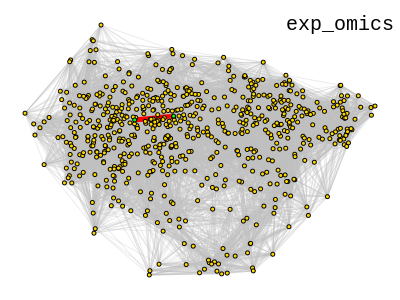

In [ ]:
knn_exp_omics = ig.Graph.TupleList([tuple(x) for x in knn_exp_omics.values], directed = False)
# knn_exp_omics.vs["label"] = knn_exp_omics.vs['name']

visual_style = {}
visual_style["bbox"] = (400, 300)
visual_style["margin"] = 25

p = Plot("exp_omics_graph.png", bbox = (400, 300), background = "white")
layout = knn_exp_omics.layout_mds()
knn_exp_omics.vs['color'] = ['green' if x['name']  in ['TCGA.Z7.A8R6.01', 'TCGA.E9.A1N4.11'] else 'gold' for x
                             in knn_exp_omics.vs]
knn_exp_omics.es['color'] = 'rgba(192, 192, 192, 0.3)'
vertex_source = set(['TCGA.Z7.A8R6.01'])
vertex_target = set(['TCGA.E9.A1N4.11'])
red_edges = knn_exp_omics.es.select(_source_in = vertex_source, _target_in = vertex_target)
red_edges['color'] = 'red'
red_edges['width'] = 5
p.add(knn_exp_omics, layout = layout, vertex_size = 4, vertex_label_size = 6, **visual_style)
p.redraw()

ctx = cairocffi.Context(p.surface)
ctx.set_font_size(20)
drawer = TextDrawer(ctx, 'exp_omics KNN Graph', halign = TextDrawer.CENTER)
drawer.draw_at(300, 30, width = 200)

# plot.show()
p.save()
display(Image('exp_omics_graph.png', width = 1000))

In [ ]:
knn_mirna_omics = kneighbors_graph(mirna_omics.values, n_neighbor, metric = 'hamming', mode = 'connectivity').toarray()
knn_mirna_omics = pd.DataFrame(knn_mirna_omics, columns = omic1.index, index = omic1.index)

knn_mirna_omics = knn_mirna_omics.stack().reset_index()
knn_mirna_omics = knn_mirna_omics.rename(columns = {'level_0': 'patient_0', 'level_1': 'patient_1', 0: 'connectivity'})
knn_mirna_omics = knn_mirna_omics.loc[knn_mirna_omics['connectivity'] != 0]
knn_mirna_omics

,patient_0,patient_1,connectivity
7,TCGA.3C.AALI.01,TCGA.A1.A0SB.01,1.0
27,TCGA.3C.AALI.01,TCGA.A2.A25B.01,1.0
40,TCGA.3C.AALI.01,TCGA.A2.A3XY.01,1.0
49,TCGA.3C.AALI.01,TCGA.A2.A4S3.01,1.0
52,TCGA.3C.AALI.01,TCGA.A7.A13E.01,1.0
...,...,...,...
467672,TCGA.Z7.A8R6.01,TCGA.E9.A1RF.11,1.0
467685,TCGA.Z7.A8R6.01,TCGA.E9.A22D.01,1.0
467727,TCGA.Z7.A8R6.01,TCGA.EW.A1P5.01,1.0
467777,TCGA.Z7.A8R6.01,TCGA.JL.A3YW.01,1.0


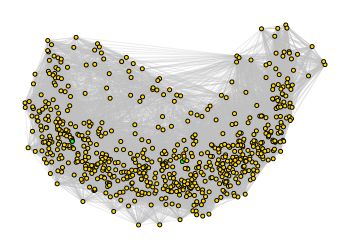

In [ ]:
#making igraph object
knn_mirna_omics = ig.Graph.TupleList([tuple(x) for x in knn_mirna_omics.values], directed = False)

visual_style = {}
visual_style["bbox"] = (350, 250)
visual_style["margin"] = 25

p = Plot("knn_mirna_graph.png", bbox = (350, 250), background = "white")
layout = knn_mirna_omics.layout_mds()
knn_mirna_omics.vs['color'] = ['green' if x['name']  in ['TCGA.Z7.A8R6.01', 'TCGA.PE.A5DE.01'] else 'gold' for x
                             in knn_mirna_omics.vs]
knn_mirna_omics.es['color'] = 'rgba(192, 192, 192, 0.3)'
vertex_source = set(['TCGA.Z7.A8R6.01'])
vertex_target = set(['TCGA.PE.A5DE.01'])
red_edges = knn_mirna_omics.es.select(_source_in = vertex_source, _target_in = vertex_target)
red_edges['color'] = 'red'
red_edges['width'] = 5
p.add(knn_mirna_omics, layout = layout, vertex_size = 4, vertex_label_size = 6, **visual_style)
p.redraw()

# ctx = cairocffi.Context(p.surface)
# ctx.set_font_size(20)
# drawer = TextDrawer(ctx, 'mirna_omics KNN Graph', halign = TextDrawer.CENTER)
# drawer.draw_at(7, 50, width = 60)
p.save()
# plot.show()
display(Image('knn_mirna_graph.png', width = 800))

In [ ]:
knn_methy_omics = kneighbors_graph(methy_omics.values, n_neighbor, metric = 'hamming',
                                  mode = 'connectivity').toarray()
knn_methy_omics = pd.DataFrame(knn_methy_omics, columns = omic1.index, index = omic1.index)

knn_methy_omics = knn_methy_omics.stack().reset_index()
knn_methy_omics = knn_methy_omics.rename(columns = {'level_0': 'patient_0', 'level_1': 'patient_0', 0: 'connectivity'})
knn_methy_omics = knn_methy_omics.loc[knn_methy_omics['connectivity'] != 0]
knn_methy_omics

,patient_0,patient_0,connectivity
22,TCGA.3C.AALI.01,TCGA.A2.A1G1.01,1.0
159,TCGA.3C.AALI.01,TCGA.AR.A1AR.01,1.0
433,TCGA.3C.AALI.01,TCGA.E2.A1IL.01,1.0
434,TCGA.3C.AALI.01,TCGA.E2.A1IN.01,1.0
435,TCGA.3C.AALI.01,TCGA.E2.A1IO.01,1.0
...,...,...,...
467638,TCGA.Z7.A8R6.01,TCGA.E9.A1N5.11,1.0
467639,TCGA.Z7.A8R6.01,TCGA.E9.A1N5.01,1.0
467640,TCGA.Z7.A8R6.01,TCGA.E9.A1N6.11,1.0
467641,TCGA.Z7.A8R6.01,TCGA.E9.A1N6.01,1.0


In [ ]:
#making igraph object
knn_methy_omics = ig.Graph.TupleList([tuple(x) for x in knn_methy_omics.values], directed = False)
# visual_style = {}
# visual_style["bbox"] = (400, 300)
# visual_style["margin"] = 25

# p = Plot("knn_methyl_graph.png", bbox = (400, 300), background = "white")
# layout = knn_methy_omics.layout_mds()
# knn_methy_omics.vs['color'] = ['green' if x['name']  in ['TCGA.Z7.A8R6.01', 'TCGA.E9.A1N6.01'] else 'gold' for x
#                              in knn_methy_omics.vs]
# knn_methy_omics.es['color'] = 'rgba(192, 192, 192, 0.3)'
# vertex_source = set(['TCGA.Z7.A8R6.01'])
# vertex_target = set(['TCGA.E9.A1N6.01'])
# red_edges = knn_methy_omics.es.select(_source_in = vertex_source, _target_in = vertex_target)
# red_edges['color'] = 'red'
# red_edges['width'] = 5
# p.add(knn_methy_omics, layout = layout, vertex_size = 4, vertex_label_size = 6, **visual_style)
# p.redraw()

# # ctx = cairocffi.Context(p.surface)
# # ctx.set_font_size(20)
# # drawer = TextDrawer(ctx, 'methyl_omics KNN Graph', halign = TextDrawer.CENTER)
# # drawer.draw_at(300, 30, width = 200)

# # plot.show()
# p.save()
# display(Image('knn_methyl_graph.png', width = 1000))

In [ ]:
common_nodes = intersection([knn_exp_omics, knn_mirna_omics, knn_methy_omics])

In [ ]:
common_nodes.vcount()

684

##Checking dependencies

In [ ]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)


PyTorch version: 2.0.1+cu118
CUDA available: True
CUDA version: 11.8


# **GNN 2**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
import networkx as nx
import pandas as pd
from tqdm import tqdm

class GNN(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GNN, self).__init__()
        self.conv1 = dgl.nn.GraphConv(in_feats, hidden_feats)
        self.conv2 = dgl.nn.GraphConv(hidden_feats, hidden_feats)
        self.conv3 = dgl.nn.GraphConv(hidden_feats, out_feats)

    def forward(self, graph, feat):
        h = feat
        h = F.relu(self.conv1(graph, h))
        h = F.relu(self.conv2(graph, h))
        h = self.conv3(graph, h)
        return h

def train_gnn_on_graph(graph, graph_name):
    degrees = graph.degree()
    # Create a feature matrix with a single column for node degrees
    features = torch.tensor(degrees, dtype=torch.float32).view(-1, 1)

    # Create a NetworkX graph from the igraph object
    nx_graph = nx.Graph()
    nx_graph.add_nodes_from(range(graph.vcount()))
    nx_graph.add_edges_from(graph.get_edgelist())

    # Creating a DGL graph from the NetworkX graph
    g = dgl.from_networkx(nx_graph)

    # Setting features for each node in the graph
    g.ndata['feat'] = features

    num_features = features.shape[1]
    # Creating an instance of the GNN
    model = GNN(num_features, 32, 64)

    # Defining the optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the model for 100 epochs
    for epoch in tqdm(range(100), desc='Training on {}'.format(graph_name), unit='epoch'):
        optimizer.zero_grad()
        output = model(g, g.ndata['feat'])
        loss = criterion(output, torch.zeros_like(output))
        loss.backward()
        optimizer.step()
        tqdm.write('Epoch {}/{} ==================>  loss: {:.4f}'.format(epoch + 1, 100, loss.item()))

    # Return the trained model
    return model

# Create a list of graphs and their corresponding names
graphs = [knn_exp_omics, knn_mirna_omics, knn_methy_omics]
graph_names = ['knn_exp_omics', 'knn_mirna_omics', 'knn_methyl_omics']

# Train the GNN model on each graph separately
trained_models = []
for i, graph in enumerate(graphs):
    graph_name = graph_names[i]
    trained_model = train_gnn_on_graph(graph, graph_name)
    trained_models.append(trained_model)

# Generate node embeddings for each graph
embeddings_dfs = []
for i, graph in enumerate(graphs):
    model = trained_models[i]
    features = torch.tensor(graph.degree(), dtype=torch.float32).view(-1, 1)
    g = dgl.from_networkx(nx.Graph(graph.get_edgelist()))
    g.ndata['feat'] = features
    embeddings = model(g, g.ndata['feat']).detach().numpy()
    embeddings_df = pd.DataFrame(embeddings)
    embeddings_dfs.append(embeddings_df)

# Concatenate the embeddings dataframes column-wise
result_df = pd.concat(embeddings_dfs, axis=1)


Training on knn_exp_omics:   0%|          | 0/100 [00:00<?, ?epoch/s]/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
Training on knn_exp_omics:   8%|▊         | 8/100 [00:00<00:02, 36.20epoch/s]

Epoch 1/100 ==================>  loss: 7.6398
Epoch 2/100 ==================>  loss: 2.6210
Epoch 3/100 ==================>  loss: 0.8560
Epoch 4/100 ==================>  loss: 0.5172
Epoch 5/100 ==================>  loss: 0.5002
Epoch 6/100 ==================>  loss: 0.4353
Epoch 7/100 ==================>  loss: 0.3181
Epoch 8/100 ==================>  loss: 0.1949
Epoch 9/100 ==================>  loss: 0.1054
Epoch 10/100 ==================>  loss: 0.0418
Epoch 11/100 ==================>  loss: 0.0129
Epoch 12/100 ==================>  loss: 0.0079
Epoch 13/100 ==================>  loss: 0.0043
Epoch 14/100 ==================>  loss: 0.0032


Epoch 15/100 ==================>  loss: 0.0029
Epoch 16/100 ==================>  loss: 0.0027
Epoch 17/100 ==================>  loss: 0.0028
Epoch 18/100 ==================>  loss: 0.0028
Epoch 19/100 ==================>  loss: 0.0029
Epoch 20/100 ==================>  loss: 0.0029
Epoch 21/100 ==================>  loss: 0.0030
Epoch 22/100 ==================>  loss: 0.0030
Epoch 23/100 ==================>  loss: 0.0030
Epoch 24/100 ==================>  loss: 0.0030
Epoch 25/100 ==================>  loss: 0.0030
Epoch 26/100 ==================>  loss: 0.0029
Epoch 27/100 ==================>  loss: 0.0029
Epoch 28/100 ==================>  loss: 0.0029
Epoch 29/100 ==================>  loss: 0.0028


Training on knn_exp_omics:  38%|███▊      | 38/100 [00:00<00:00, 64.98epoch/s]

Epoch 30/100 ==================>  loss: 0.0028
Epoch 31/100 ==================>  loss: 0.0027
Epoch 32/100 ==================>  loss: 0.0026
Epoch 33/100 ==================>  loss: 0.0026
Epoch 34/100 ==================>  loss: 0.0025
Epoch 35/100 ==================>  loss: 0.0024
Epoch 36/100 ==================>  loss: 0.0023
Epoch 37/100 ==================>  loss: 0.0023
Epoch 38/100 ==================>  loss: 0.0022
Epoch 39/100 ==================>  loss: 0.0021
Epoch 40/100 ==================>  loss: 0.0020
Epoch 41/100 ==================>  loss: 0.0020
Epoch 42/100 ==================>  loss: 0.0019
Epoch 43/100 ==================>  loss: 0.0018


Training on knn_exp_omics:  52%|█████▏    | 52/100 [00:00<00:00, 65.48epoch/s]

Epoch 44/100 ==================>  loss: 0.0017
Epoch 45/100 ==================>  loss: 0.0017
Epoch 46/100 ==================>  loss: 0.0016
Epoch 47/100 ==================>  loss: 0.0015
Epoch 48/100 ==================>  loss: 0.0015
Epoch 49/100 ==================>  loss: 0.0014
Epoch 50/100 ==================>  loss: 0.0013
Epoch 51/100 ==================>  loss: 0.0013
Epoch 52/100 ==================>  loss: 0.0012
Epoch 53/100 ==================>  loss: 0.0012
Epoch 54/100 ==================>  loss: 0.0011
Epoch 55/100 ==================>  loss: 0.0011
Epoch 56/100 ==================>  loss: 0.0010
Epoch 57/100 ==================>  loss: 0.0010
Epoch 58/100 ==================>  loss: 0.0009


Epoch 59/100 ==================>  loss: 0.0009
Epoch 60/100 ==================>  loss: 0.0008
Epoch 61/100 ==================>  loss: 0.0008
Epoch 62/100 ==================>  loss: 0.0008
Epoch 63/100 ==================>  loss: 0.0007
Epoch 64/100 ==================>  loss: 0.0007
Epoch 65/100 ==================>  loss: 0.0007
Epoch 66/100 ==================>  loss: 0.0006
Epoch 67/100 ==================>  loss: 0.0006
Epoch 68/100 ==================>  loss: 0.0006
Epoch 69/100 ==================>  loss: 0.0006
Epoch 70/100 ==================>  loss: 0.0005
Epoch 71/100 ==================>  loss: 0.0005
Epoch 72/100 ==================>  loss: 0.0005


Training on knn_exp_omics:  82%|████████▏ | 82/100 [00:01<00:00, 65.92epoch/s]

Epoch 73/100 ==================>  loss: 0.0005
Epoch 74/100 ==================>  loss: 0.0004
Epoch 75/100 ==================>  loss: 0.0004
Epoch 76/100 ==================>  loss: 0.0004
Epoch 77/100 ==================>  loss: 0.0004
Epoch 78/100 ==================>  loss: 0.0004
Epoch 79/100 ==================>  loss: 0.0004
Epoch 80/100 ==================>  loss: 0.0003
Epoch 81/100 ==================>  loss: 0.0003
Epoch 82/100 ==================>  loss: 0.0003
Epoch 83/100 ==================>  loss: 0.0003
Epoch 84/100 ==================>  loss: 0.0003
Epoch 85/100 ==================>  loss: 0.0003
Epoch 86/100 ==================>  loss: 0.0003


Training on knn_exp_omics: 100%|██████████| 100/100 [00:01<00:00, 62.58epoch/s]


Epoch 87/100 ==================>  loss: 0.0003
Epoch 88/100 ==================>  loss: 0.0003
Epoch 89/100 ==================>  loss: 0.0002
Epoch 90/100 ==================>  loss: 0.0002
Epoch 91/100 ==================>  loss: 0.0002
Epoch 92/100 ==================>  loss: 0.0002
Epoch 93/100 ==================>  loss: 0.0002
Epoch 94/100 ==================>  loss: 0.0002
Epoch 95/100 ==================>  loss: 0.0002
Epoch 96/100 ==================>  loss: 0.0002
Epoch 97/100 ==================>  loss: 0.0002
Epoch 98/100 ==================>  loss: 0.0002
Epoch 99/100 ==================>  loss: 0.0002
Epoch 100/100 ==================>  loss: 0.0002


Training on knn_mirna_omics:  14%|█▍        | 14/100 [00:00<00:01, 65.89epoch/s]

Epoch 1/100 ==================>  loss: 14.4523
Epoch 2/100 ==================>  loss: 6.5099
Epoch 3/100 ==================>  loss: 2.9929
Epoch 4/100 ==================>  loss: 1.4988
Epoch 5/100 ==================>  loss: 0.8323
Epoch 6/100 ==================>  loss: 0.4939
Epoch 7/100 ==================>  loss: 0.3130
Epoch 8/100 ==================>  loss: 0.1920
Epoch 9/100 ==================>  loss: 0.1311
Epoch 10/100 ==================>  loss: 0.0975
Epoch 11/100 ==================>  loss: 0.0669
Epoch 12/100 ==================>  loss: 0.0340
Epoch 13/100 ==================>  loss: 0.0162
Epoch 14/100 ==================>  loss: 0.0096


Training on knn_mirna_omics:  28%|██▊       | 28/100 [00:00<00:01, 67.25epoch/s]

Epoch 15/100 ==================>  loss: 0.0074
Epoch 16/100 ==================>  loss: 0.0065
Epoch 17/100 ==================>  loss: 0.0061
Epoch 18/100 ==================>  loss: 0.0063
Epoch 19/100 ==================>  loss: 0.0066
Epoch 20/100 ==================>  loss: 0.0068
Epoch 21/100 ==================>  loss: 0.0070
Epoch 22/100 ==================>  loss: 0.0071
Epoch 23/100 ==================>  loss: 0.0072
Epoch 24/100 ==================>  loss: 0.0073
Epoch 25/100 ==================>  loss: 0.0074
Epoch 26/100 ==================>  loss: 0.0074
Epoch 27/100 ==================>  loss: 0.0074
Epoch 28/100 ==================>  loss: 0.0074


Training on knn_mirna_omics:  42%|████▏     | 42/100 [00:00<00:00, 67.35epoch/s]

Epoch 29/100 ==================>  loss: 0.0074
Epoch 30/100 ==================>  loss: 0.0073
Epoch 31/100 ==================>  loss: 0.0072
Epoch 32/100 ==================>  loss: 0.0072
Epoch 33/100 ==================>  loss: 0.0071
Epoch 34/100 ==================>  loss: 0.0070
Epoch 35/100 ==================>  loss: 0.0068
Epoch 36/100 ==================>  loss: 0.0067
Epoch 37/100 ==================>  loss: 0.0066
Epoch 38/100 ==================>  loss: 0.0065
Epoch 39/100 ==================>  loss: 0.0063
Epoch 40/100 ==================>  loss: 0.0062
Epoch 41/100 ==================>  loss: 0.0061
Epoch 42/100 ==================>  loss: 0.0059


Training on knn_mirna_omics:  49%|████▉     | 49/100 [00:00<00:00, 67.24epoch/s]

Epoch 43/100 ==================>  loss: 0.0058
Epoch 44/100 ==================>  loss: 0.0056
Epoch 45/100 ==================>  loss: 0.0055
Epoch 46/100 ==================>  loss: 0.0054
Epoch 47/100 ==================>  loss: 0.0052
Epoch 48/100 ==================>  loss: 0.0051
Epoch 49/100 ==================>  loss: 0.0050
Epoch 50/100 ==================>  loss: 0.0048
Epoch 51/100 ==================>  loss: 0.0047
Epoch 52/100 ==================>  loss: 0.0046
Epoch 53/100 ==================>  loss: 0.0044
Epoch 54/100 ==================>  loss: 0.0043
Epoch 55/100 ==================>  loss: 0.0042
Epoch 56/100 ==================>  loss: 0.0041
Epoch 57/100 ==================>  loss: 0.0040


Training on knn_mirna_omics:  66%|██████▌   | 66/100 [00:01<00:00, 70.08epoch/s]

Epoch 58/100 ==================>  loss: 0.0038
Epoch 59/100 ==================>  loss: 0.0037
Epoch 60/100 ==================>  loss: 0.0036
Epoch 61/100 ==================>  loss: 0.0035
Epoch 62/100 ==================>  loss: 0.0034
Epoch 63/100 ==================>  loss: 0.0033
Epoch 64/100 ==================>  loss: 0.0032
Epoch 65/100 ==================>  loss: 0.0031
Epoch 66/100 ==================>  loss: 0.0030
Epoch 67/100 ==================>  loss: 0.0029
Epoch 68/100 ==================>  loss: 0.0029
Epoch 69/100 ==================>  loss: 0.0028
Epoch 70/100 ==================>  loss: 0.0027
Epoch 71/100 ==================>  loss: 0.0026
Epoch 72/100 ==================>  loss: 0.0025


Training on knn_mirna_omics:  82%|████████▏ | 82/100 [00:01<00:00, 70.01epoch/s]

Epoch 73/100 ==================>  loss: 0.0025
Epoch 74/100 ==================>  loss: 0.0024
Epoch 75/100 ==================>  loss: 0.0023
Epoch 76/100 ==================>  loss: 0.0022
Epoch 77/100 ==================>  loss: 0.0022
Epoch 78/100 ==================>  loss: 0.0021
Epoch 79/100 ==================>  loss: 0.0020
Epoch 80/100 ==================>  loss: 0.0020
Epoch 81/100 ==================>  loss: 0.0019
Epoch 82/100 ==================>  loss: 0.0019
Epoch 83/100 ==================>  loss: 0.0018
Epoch 84/100 ==================>  loss: 0.0018
Epoch 85/100 ==================>  loss: 0.0017
Epoch 86/100 ==================>  loss: 0.0016
Epoch 87/100 ==================>  loss: 0.0016


Training on knn_mirna_omics: 100%|██████████| 100/100 [00:01<00:00, 69.80epoch/s]


Epoch 88/100 ==================>  loss: 0.0015
Epoch 89/100 ==================>  loss: 0.0015
Epoch 90/100 ==================>  loss: 0.0015
Epoch 91/100 ==================>  loss: 0.0014
Epoch 92/100 ==================>  loss: 0.0014
Epoch 93/100 ==================>  loss: 0.0013
Epoch 94/100 ==================>  loss: 0.0013
Epoch 95/100 ==================>  loss: 0.0012
Epoch 96/100 ==================>  loss: 0.0012
Epoch 97/100 ==================>  loss: 0.0012
Epoch 98/100 ==================>  loss: 0.0011
Epoch 99/100 ==================>  loss: 0.0011
Epoch 100/100 ==================>  loss: 0.0011


Training on knn_methyl_omics:   8%|▊         | 8/100 [00:00<00:01, 70.39epoch/s]

Epoch 1/100 ==================>  loss: 111.2313
Epoch 2/100 ==================>  loss: 49.6993
Epoch 3/100 ==================>  loss: 22.4029
Epoch 4/100 ==================>  loss: 11.3092
Epoch 5/100 ==================>  loss: 6.9723
Epoch 6/100 ==================>  loss: 4.9417
Epoch 7/100 ==================>  loss: 3.4234
Epoch 8/100 ==================>  loss: 2.2991
Epoch 9/100 ==================>  loss: 1.5159
Epoch 10/100 ==================>  loss: 0.9439
Epoch 11/100 ==================>  loss: 0.5082
Epoch 12/100 ==================>  loss: 0.2227
Epoch 13/100 ==================>  loss: 0.0607


Training on knn_methyl_omics:  23%|██▎       | 23/100 [00:00<00:01, 58.08epoch/s]

Epoch 14/100 ==================>  loss: 0.0166
Epoch 15/100 ==================>  loss: 0.0182
Epoch 16/100 ==================>  loss: 0.0184
Epoch 17/100 ==================>  loss: 0.0174
Epoch 18/100 ==================>  loss: 0.0155
Epoch 19/100 ==================>  loss: 0.0442
Epoch 20/100 ==================>  loss: 0.0105
Epoch 21/100 ==================>  loss: 0.0090
Epoch 22/100 ==================>  loss: 0.0075
Epoch 23/100 ==================>  loss: 0.0066
Epoch 24/100 ==================>  loss: 0.0067


Training on knn_methyl_omics:  36%|███▌      | 36/100 [00:00<00:01, 59.22epoch/s]

Epoch 25/100 ==================>  loss: 0.0069
Epoch 26/100 ==================>  loss: 0.0069
Epoch 27/100 ==================>  loss: 0.0070
Epoch 28/100 ==================>  loss: 0.0071
Epoch 29/100 ==================>  loss: 0.0071
Epoch 30/100 ==================>  loss: 0.0071
Epoch 31/100 ==================>  loss: 0.0072
Epoch 32/100 ==================>  loss: 0.0072
Epoch 33/100 ==================>  loss: 0.0072
Epoch 34/100 ==================>  loss: 0.0071
Epoch 35/100 ==================>  loss: 0.0071
Epoch 36/100 ==================>  loss: 0.0071
Epoch 37/100 ==================>  loss: 0.0071


Training on knn_methyl_omics:  50%|█████     | 50/100 [00:00<00:00, 61.86epoch/s]

Epoch 38/100 ==================>  loss: 0.0070
Epoch 39/100 ==================>  loss: 0.0070
Epoch 40/100 ==================>  loss: 0.0069
Epoch 41/100 ==================>  loss: 0.0069
Epoch 42/100 ==================>  loss: 0.0068
Epoch 43/100 ==================>  loss: 0.0067
Epoch 44/100 ==================>  loss: 0.0067
Epoch 45/100 ==================>  loss: 0.0066
Epoch 46/100 ==================>  loss: 0.0065
Epoch 47/100 ==================>  loss: 0.0065
Epoch 48/100 ==================>  loss: 0.0064
Epoch 49/100 ==================>  loss: 0.0063
Epoch 50/100 ==================>  loss: 0.0062
Epoch 51/100 ==================>  loss: 0.0062


Training on knn_methyl_omics:  65%|██████▌   | 65/100 [00:01<00:00, 66.96epoch/s]

Epoch 52/100 ==================>  loss: 0.0061
Epoch 53/100 ==================>  loss: 0.0060
Epoch 54/100 ==================>  loss: 0.0059
Epoch 55/100 ==================>  loss: 0.0058
Epoch 56/100 ==================>  loss: 0.0058
Epoch 57/100 ==================>  loss: 0.0057
Epoch 58/100 ==================>  loss: 0.0056
Epoch 59/100 ==================>  loss: 0.0055
Epoch 60/100 ==================>  loss: 0.0054
Epoch 61/100 ==================>  loss: 0.0054
Epoch 62/100 ==================>  loss: 0.0053
Epoch 63/100 ==================>  loss: 0.0052
Epoch 64/100 ==================>  loss: 0.0051
Epoch 65/100 ==================>  loss: 0.0051
Epoch 66/100 ==================>  loss: 0.0050


Epoch 67/100 ==================>  loss: 0.0049
Epoch 68/100 ==================>  loss: 0.0048
Epoch 69/100 ==================>  loss: 0.0048
Epoch 70/100 ==================>  loss: 0.0047
Epoch 71/100 ==================>  loss: 0.0046
Epoch 72/100 ==================>  loss: 0.0046
Epoch 73/100 ==================>  loss: 0.0045
Epoch 74/100 ==================>  loss: 0.0044
Epoch 75/100 ==================>  loss: 0.0044
Epoch 76/100 ==================>  loss: 0.0043
Epoch 77/100 ==================>  loss: 0.0042
Epoch 78/100 ==================>  loss: 0.0042
Epoch 79/100 ==================>  loss: 0.0041
Epoch 80/100 ==================>  loss: 0.0040


Training on knn_methyl_omics:  88%|████████▊ | 88/100 [00:01<00:00, 68.97epoch/s]

Epoch 81/100 ==================>  loss: 0.0040
Epoch 82/100 ==================>  loss: 0.0039
Epoch 83/100 ==================>  loss: 0.0038
Epoch 84/100 ==================>  loss: 0.0038
Epoch 85/100 ==================>  loss: 0.0037
Epoch 86/100 ==================>  loss: 0.0037
Epoch 87/100 ==================>  loss: 0.0036
Epoch 88/100 ==================>  loss: 0.0036
Epoch 89/100 ==================>  loss: 0.0035
Epoch 90/100 ==================>  loss: 0.0035
Epoch 91/100 ==================>  loss: 0.0034
Epoch 92/100 ==================>  loss: 0.0034
Epoch 93/100 ==================>  loss: 0.0033
Epoch 94/100 ==================>  loss: 0.0032
Epoch 95/100 ==================>  loss: 0.0032


Training on knn_methyl_omics: 100%|██████████| 100/100 [00:01<00:00, 65.09epoch/s]


Epoch 96/100 ==================>  loss: 0.0032
Epoch 97/100 ==================>  loss: 0.0031
Epoch 98/100 ==================>  loss: 0.0031
Epoch 99/100 ==================>  loss: 0.0030
Epoch 100/100 ==================>  loss: 0.0030


In [ ]:
survival_df = pd.read_excel('/content/survival.xlsx')
clinical_df = pd.concat([Ids, survival_df], axis=1)

In [ ]:
embendings = pd.concat([clinical_df, result_df], axis = 1)
# pd.set_option("display.max_rows", None, "display.max_columns", None)
embendings.columns.values[0] = 'Patient_ID'
embendings.set_index('Patient_ID')

###Adding survival data to the embedding

In [ ]:
survival_df = pd.read_excel('/content/survival.xlsx')
clinical_df = pd.concat([Ids, survival_df], axis=1)
results_df = pd.concat([clinical_df, result_df], axis = 1)

In [ ]:
results_df

,0,Survival,Death,0,1,2,3,4,5,6,...,182,183,184,185,186,187,188,189,190,191
0,TCGA.3C.AALI.01,812.0,0,59.284496,59.233917,59.375393,59.443050,59.283257,59.510986,59.567135,...,39.992992,43.712032,43.458969,39.131466,43.118610,42.304276,39.108898,40.254139,40.212746,43.236675
1,TCGA.3C.AALJ.01,1448.0,0,89.964325,89.881699,90.068710,90.138939,89.974457,90.310371,90.343185,...,36.358997,39.945690,39.683781,35.553955,39.353085,38.565804,35.519852,36.605190,36.606934,39.472256
2,TCGA.3C.AALK.01,3807.0,0,113.296066,113.190544,113.408195,113.480438,113.314957,113.733093,113.746719,...,39.843399,43.556988,43.303562,38.984196,42.963596,42.150375,38.961151,40.103924,40.064304,43.081707
3,TCGA.4H.AAAK.01,511.0,0,71.317200,71.252663,71.418205,71.484978,71.318794,71.588898,71.637718,...,652.576965,678.606750,679.845093,642.192871,677.875732,672.501343,644.115112,655.357666,648.044128,677.807495
4,TCGA.5L.AAT0.01,672.0,0,81.348244,81.280823,81.438789,81.507805,81.355064,81.660332,81.693596,...,655.192871,681.317993,682.562744,644.768127,680.586426,675.192444,646.698669,657.984436,650.639771,680.517334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,TCGA.WT.AB44.01,1876.0,0,47.442654,47.455593,47.447441,47.508327,47.434731,47.618435,47.633591,...,30.816402,34.201237,33.925835,30.097517,33.609871,32.863853,30.045818,31.039799,31.107336,33.730728
680,TCGA.XX.A899.01,2019.0,0,46.098930,46.127151,46.079739,46.140083,46.090813,46.269226,46.271595,...,30.816402,34.201237,33.925835,30.097517,33.609871,32.863853,30.045818,31.039799,31.107336,33.730728
681,TCGA.XX.A89A.01,348.0,1,45.505337,45.532448,45.487728,45.548935,45.497677,45.674110,45.678474,...,30.816402,34.201237,33.925835,30.097517,33.609871,32.863853,30.045818,31.039799,31.107336,33.730728
682,TCGA.Z7.A8R5.01,4159.0,0,46.400063,46.424034,46.386284,46.447842,46.392849,46.572536,46.578362,...,30.816402,34.201237,33.925835,30.097517,33.609871,32.863853,30.045818,31.039799,31.107336,33.730728


In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

Now we performs cluster analysis and visualization using t-SNE and k-means clustering. t-SNE is applied to reduce the dimensionality of the input data to 2 dimensions. Next, a loop iterates over a range of cluster numbers, applying k-means clustering and calculating the silhouette score for each cluster. The code tracks the best silhouette score, optimal number of clusters, and corresponding cluster labels. A line plot is generated to visualize the silhouette scores, providing insights into the quality of clustering. Additionally, a scatter plot is created to visualize the t-SNE embeddings, where each point represents a data point colored by its assigned cluster label. This visual representation includes a color bar and a title indicating the optimal number of clusters determined from the silhouette score analysis. Overall, the code allows for cluster analysis and visualization to gain insights into the underlying structure of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

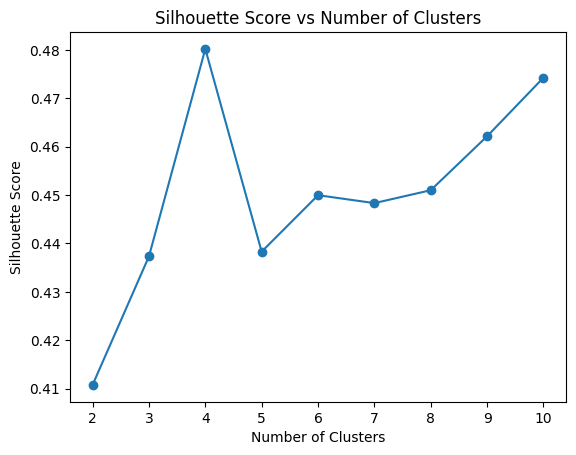

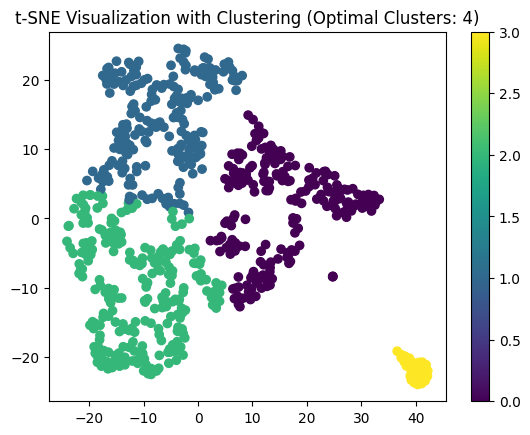

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE on the graph embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(result_df)

# Calculate silhouette scores for different number of clusters
silhouette_scores = []
cluster_labels_best = None
n_clusters_best = -1
silhouette_score_best = -1

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings_tsne)
    silhouette_avg = silhouette_score(embeddings_tsne, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > silhouette_score_best:
        silhouette_score_best = silhouette_avg
        n_clusters_best = n_clusters
        cluster_labels_best = cluster_labels

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Visualize t-SNE with optimal number of clusters
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=cluster_labels_best, cmap='viridis')
plt.title("t-SNE Visualization with Clustering (Optimal Clusters: {})".format(n_clusters_best))
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

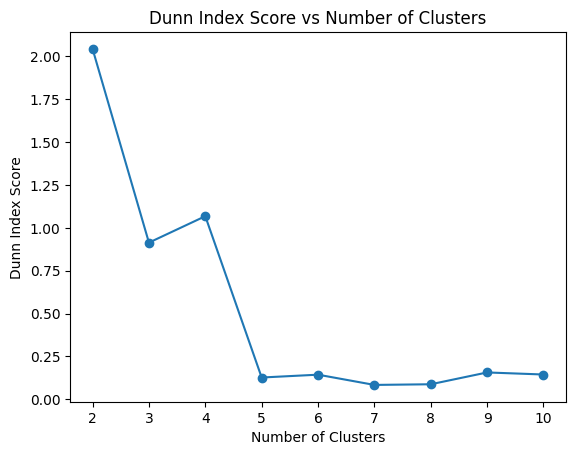

In [ ]:
from scipy.spatial.distance import cdist

# Calculate Dunn index scores for different number of clusters
dunn_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(result_df)
    cluster_centers = kmeans.cluster_centers_

    # Calculate the minimum distance between clusters
    min_distances = cdist(cluster_centers, cluster_centers, 'euclidean')
    np.fill_diagonal(min_distances, np.inf)
    min_distance = np.min(min_distances)

    # Calculate the maximum diameter within clusters
    max_diameter = 0
    for i in range(n_clusters):
        cluster_points = result_df[cluster_labels == i]
        diameter = np.max(cdist(cluster_points, cluster_points, 'euclidean'))
        if diameter > max_diameter:
            max_diameter = diameter

    # Calculate Dunn index score
    dunn_score = min_distance / max_diameter
    dunn_scores.append(dunn_score)

# Plot the Dunn index scores
plt.plot(range(2, 11), dunn_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index Score')
plt.title('Dunn Index Score vs Number of Clusters')
plt.show()


# **GNN 1**

##Graph Neural Network Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
import networkx as nx
import pandas as pd
from tqdm import tqdm

class GNN(nn.Module):

    '''GNN Class defines a Graph Neural Network (GNN) model using PyTorch and the DGL library.
    The GNN model consists of three graph convolution layers (conv1, conv2, and conv3) that process the input features and generate node representations.
    The forward method defines the forward pass of the model, where the input graph and features are passed through the graph convolution layers, with activation functions applied in between.'''

    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GNN, self).__init__()
        self.conv1 = dgl.nn.GraphConv(in_feats, hidden_feats)
        self.conv2 = dgl.nn.GraphConv(hidden_feats, hidden_feats)
        self.conv3 = dgl.nn.GraphConv(hidden_feats, out_feats)

    def forward(self, graph, feat):
        h = feat
        h = F.relu(self.conv1(graph, h))
        h = F.relu(self.conv2(graph, h))
        h = self.conv3(graph, h)
        return h

def train_gnn_on_graph(graph, graph_name):

    '''This code defines the train_gnn_on_graph function, which takes a graph and its name as input and trains a GNN model on that graph.
    It starts by calculating the degrees of the nodes in the input graph and creates a feature matrix with a single column for node degrees.
    The degrees are converted to a PyTorch tensor using torch.tensor.
    Next, a NetworkX graph is created and populated with nodes and edges based on the input graph.
    The NetworkX graph is then converted to a DGL graph using dgl.from_networkx. The feature matrix is assigned to the 'feat' attribute of the nodes in the DGL graph.
    The GNN model is instantiated with the number of input features, hidden dimensions, and output dimensions.
    The optimizer is defined as Adam with a learning rate of 0.1, and the loss function is set to mean squared error (MSE).'''

    degrees = graph.degree()
    # Create a feature matrix with a single column for node degrees
    features = torch.tensor(degrees, dtype=torch.float32).view(-1, 1)

    # Creating a NetworkX graph from the igraph object
    nx_graph = nx.Graph()
    nx_graph.add_nodes_from(range(graph.vcount()))
    nx_graph.add_edges_from(graph.get_edgelist())

    # Creating a DGL graph from the NetworkX graph
    g = dgl.from_networkx(nx_graph)

    # Setting features for each node in the graph
    g.ndata['feat'] = features

    num_features = features.shape[1]
    # Creating an instance of the GNN
    model = GNN(num_features, 32, 64)

    # Defining the optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    criterion = nn.MSELoss()

    # Training the model for 100 epochs
    for epoch in tqdm(range(100), desc='Training on {}'.format(graph_name), unit='epoch'):
        model.train()
        optimizer.zero_grad()
        output = model(g, g.ndata['feat'])
        loss = criterion(output, g.ndata['feat'])  # Use the node features as the target for graph embedding prediction
        loss.backward()
        optimizer.step()
        tqdm.write('Epoch {}/{} ==================>  loss: {:.4f}'.format(epoch + 1, 200, loss.item()))

    # Return the trained model and the graph embedding
    model.eval()
    with torch.no_grad():
        embedding = model(g, g.ndata['feat'])

    return model, embedding

# Create a list of graphs and their corresponding names
graphs = [knn_exp_omics, knn_mirna_omics, knn_methy_omics]
graph_names = ['knn_exp_omics', 'knn_mirna_omics', 'knn_methyl_omics']

# Train the GNN model on each graph separately
#The resulting graph embeddings are concatenated along the second dimension using torch.cat, resulting in a tensor of embeddings (result).
trained_models = []
graph_embeddings = []
for i, graph in enumerate(graphs):
    graph_name = graph_names[i]
    trained_model, embedding = train_gnn_on_graph(graph, graph_name)
    trained_models.append(trained_model)
    graph_embeddings.append(embedding)

# Concatenate the graph embeddings
result = torch.cat(graph_embeddings, dim=1)
result_df = pd.DataFrame(result.numpy())


Training on knn_exp_omics:   0%|          | 0/100 [00:00<?, ?epoch/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([684, 1])) that is different to the input size (torch.Size([684, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training on knn_exp_omics:   8%|▊         | 8/100 [00:00<00:02, 33.83epoch/s]

Epoch 1/200 ==================>  loss: 4369.5474
Epoch 2/200 ==================>  loss: 2489.6233
Epoch 3/200 ==================>  loss: 588.9388
Epoch 4/200 ==================>  loss: 1968.2080
Epoch 5/200 ==================>  loss: 249.4146
Epoch 6/200 ==================>  loss: 638.7003
Epoch 7/200 ==================>  loss: 1085.8843
Epoch 8/200 ==================>  loss: 1060.7697
Epoch 9/200 ==================>  loss: 729.8215
Epoch 10/200 ==================>  loss: 468.5916
Epoch 11/200 ==================>  loss: 611.7657
Epoch 12/200 ==================>  loss: 567.0367


Training on knn_exp_omics:  22%|██▏       | 22/100 [00:00<00:01, 53.23epoch/s]

Epoch 13/200 ==================>  loss: 279.5912
Epoch 14/200 ==================>  loss: 244.2379
Epoch 15/200 ==================>  loss: 367.8142
Epoch 16/200 ==================>  loss: 415.5027
Epoch 17/200 ==================>  loss: 358.3787
Epoch 18/200 ==================>  loss: 310.2187
Epoch 19/200 ==================>  loss: 325.9179
Epoch 20/200 ==================>  loss: 281.4284
Epoch 21/200 ==================>  loss: 225.1496
Epoch 22/200 ==================>  loss: 241.2626
Epoch 23/200 ==================>  loss: 276.6313
Epoch 24/200 ==================>  loss: 275.8467
Epoch 25/200 ==================>  loss: 255.1734
Epoch 26/200 ==================>  loss: 246.6983


Training on knn_exp_omics:  37%|███▋      | 37/100 [00:00<00:01, 60.84epoch/s]

Epoch 27/200 ==================>  loss: 244.4763
Epoch 28/200 ==================>  loss: 238.3871
Epoch 29/200 ==================>  loss: 240.0611
Epoch 30/200 ==================>  loss: 242.3535
Epoch 31/200 ==================>  loss: 233.0586
Epoch 32/200 ==================>  loss: 223.1920
Epoch 33/200 ==================>  loss: 227.7768
Epoch 34/200 ==================>  loss: 237.7397
Epoch 35/200 ==================>  loss: 236.1774
Epoch 36/200 ==================>  loss: 229.9885
Epoch 37/200 ==================>  loss: 227.2203
Epoch 38/200 ==================>  loss: 224.6545
Epoch 39/200 ==================>  loss: 222.6896
Epoch 40/200 ==================>  loss: 225.2806


Training on knn_exp_omics:  51%|█████     | 51/100 [00:00<00:00, 63.39epoch/s]

Epoch 41/200 ==================>  loss: 227.0653
Epoch 42/200 ==================>  loss: 223.0416
Epoch 43/200 ==================>  loss: 220.1691
Epoch 44/200 ==================>  loss: 222.0172
Epoch 45/200 ==================>  loss: 223.3511
Epoch 46/200 ==================>  loss: 222.7622
Epoch 47/200 ==================>  loss: 222.5992
Epoch 48/200 ==================>  loss: 221.3551
Epoch 49/200 ==================>  loss: 218.9002
Epoch 50/200 ==================>  loss: 218.7973
Epoch 51/200 ==================>  loss: 220.2456
Epoch 52/200 ==================>  loss: 220.0808
Epoch 53/200 ==================>  loss: 219.1885
Epoch 54/200 ==================>  loss: 218.9249


Training on knn_exp_omics:  65%|██████▌   | 65/100 [00:01<00:00, 64.21epoch/s]

Epoch 55/200 ==================>  loss: 218.4079
Epoch 56/200 ==================>  loss: 218.1982
Epoch 57/200 ==================>  loss: 218.8524
Epoch 58/200 ==================>  loss: 218.7411
Epoch 59/200 ==================>  loss: 217.7415
Epoch 60/200 ==================>  loss: 217.3248
Epoch 61/200 ==================>  loss: 217.2624
Epoch 62/200 ==================>  loss: 217.1243
Epoch 63/200 ==================>  loss: 217.3503
Epoch 64/200 ==================>  loss: 217.3330
Epoch 65/200 ==================>  loss: 216.7624
Epoch 66/200 ==================>  loss: 216.5191
Epoch 67/200 ==================>  loss: 216.5657
Epoch 68/200 ==================>  loss: 216.4177


Training on knn_exp_omics:  79%|███████▉  | 79/100 [00:01<00:00, 66.24epoch/s]

Epoch 69/200 ==================>  loss: 216.3416
Epoch 70/200 ==================>  loss: 216.1819
Epoch 71/200 ==================>  loss: 215.7975
Epoch 72/200 ==================>  loss: 215.6786
Epoch 73/200 ==================>  loss: 215.7219
Epoch 74/200 ==================>  loss: 215.5948
Epoch 75/200 ==================>  loss: 215.4802
Epoch 76/200 ==================>  loss: 215.3098
Epoch 77/200 ==================>  loss: 215.0571
Epoch 78/200 ==================>  loss: 214.9809
Epoch 79/200 ==================>  loss: 214.9244
Epoch 80/200 ==================>  loss: 214.7562
Epoch 81/200 ==================>  loss: 214.6246
Epoch 82/200 ==================>  loss: 214.4650


Training on knn_exp_omics:  93%|█████████▎| 93/100 [00:01<00:00, 65.94epoch/s]

Epoch 83/200 ==================>  loss: 214.3123
Epoch 84/200 ==================>  loss: 214.2524
Epoch 85/200 ==================>  loss: 214.1326
Epoch 86/200 ==================>  loss: 213.9687
Epoch 87/200 ==================>  loss: 213.8352
Epoch 88/200 ==================>  loss: 213.6818
Epoch 89/200 ==================>  loss: 213.5670
Epoch 90/200 ==================>  loss: 213.4689
Epoch 91/200 ==================>  loss: 213.3177
Epoch 92/200 ==================>  loss: 213.1793
Epoch 93/200 ==================>  loss: 213.0481
Epoch 94/200 ==================>  loss: 212.9136
Epoch 95/200 ==================>  loss: 212.8020
Epoch 96/200 ==================>  loss: 212.6640


Training on knn_exp_omics: 100%|██████████| 100/100 [00:01<00:00, 59.83epoch/s]


Epoch 97/200 ==================>  loss: 212.5161
Epoch 98/200 ==================>  loss: 212.3862
Epoch 99/200 ==================>  loss: 212.2508
Epoch 100/200 ==================>  loss: 212.1262


Training on knn_mirna_omics:  14%|█▍        | 14/100 [00:00<00:01, 65.71epoch/s]

Epoch 1/200 ==================>  loss: 3719.7698
Epoch 2/200 ==================>  loss: 626.7183
Epoch 3/200 ==================>  loss: 9329.9492
Epoch 4/200 ==================>  loss: 254.2032
Epoch 5/200 ==================>  loss: 1062.0947
Epoch 6/200 ==================>  loss: 2327.4546
Epoch 7/200 ==================>  loss: 2977.4902
Epoch 8/200 ==================>  loss: 3253.1853
Epoch 9/200 ==================>  loss: 3370.1030
Epoch 10/200 ==================>  loss: 3412.3479
Epoch 11/200 ==================>  loss: 3409.4531
Epoch 12/200 ==================>  loss: 3375.7588
Epoch 13/200 ==================>  loss: 3313.7339
Epoch 14/200 ==================>  loss: 3224.6689


Training on knn_mirna_omics:  28%|██▊       | 28/100 [00:00<00:01, 67.50epoch/s]

Epoch 15/200 ==================>  loss: 3101.6257
Epoch 16/200 ==================>  loss: 2935.4436
Epoch 17/200 ==================>  loss: 2715.4927
Epoch 18/200 ==================>  loss: 2432.3755
Epoch 19/200 ==================>  loss: 2085.4722
Epoch 20/200 ==================>  loss: 1696.9417
Epoch 21/200 ==================>  loss: 1327.0245
Epoch 22/200 ==================>  loss: 1066.2794
Epoch 23/200 ==================>  loss: 962.9541
Epoch 24/200 ==================>  loss: 913.8712
Epoch 25/200 ==================>  loss: 735.2126
Epoch 26/200 ==================>  loss: 424.9788
Epoch 27/200 ==================>  loss: 164.4271
Epoch 28/200 ==================>  loss: 71.5820


Epoch 29/200 ==================>  loss: 113.3260
Epoch 30/200 ==================>  loss: 196.3195
Epoch 31/200 ==================>  loss: 253.1123
Epoch 32/200 ==================>  loss: 265.7644
Epoch 33/200 ==================>  loss: 255.6384
Epoch 34/200 ==================>  loss: 258.4337
Epoch 35/200 ==================>  loss: 288.4685
Epoch 36/200 ==================>  loss: 316.5997
Epoch 37/200 ==================>  loss: 302.4680
Epoch 38/200 ==================>  loss: 251.0231
Epoch 39/200 ==================>  loss: 204.4477
Epoch 40/200 ==================>  loss: 185.0950
Epoch 41/200 ==================>  loss: 177.2497
Epoch 42/200 ==================>  loss: 157.0258


Training on knn_mirna_omics:  49%|████▉     | 49/100 [00:00<00:00, 66.77epoch/s]

Epoch 43/200 ==================>  loss: 120.7900
Epoch 44/200 ==================>  loss: 87.9033
Epoch 45/200 ==================>  loss: 77.8742
Epoch 46/200 ==================>  loss: 84.3058
Epoch 47/200 ==================>  loss: 82.5315
Epoch 48/200 ==================>  loss: 66.9161
Epoch 49/200 ==================>  loss: 56.7085
Epoch 50/200 ==================>  loss: 62.6084
Epoch 51/200 ==================>  loss: 72.9736
Epoch 52/200 ==================>  loss: 73.8851
Epoch 53/200 ==================>  loss: 67.4128
Epoch 54/200 ==================>  loss: 65.9054
Epoch 55/200 ==================>  loss: 72.6631


Training on knn_mirna_omics:  63%|██████▎   | 63/100 [00:01<00:00, 64.81epoch/s]

Epoch 56/200 ==================>  loss: 77.0102
Epoch 57/200 ==================>  loss: 72.5684
Epoch 58/200 ==================>  loss: 67.1696
Epoch 59/200 ==================>  loss: 67.8370
Epoch 60/200 ==================>  loss: 70.1075
Epoch 61/200 ==================>  loss: 67.4685
Epoch 62/200 ==================>  loss: 61.8316
Epoch 63/200 ==================>  loss: 59.4799
Epoch 64/200 ==================>  loss: 60.5967
Epoch 65/200 ==================>  loss: 59.7344
Epoch 66/200 ==================>  loss: 55.9637
Epoch 67/200 ==================>  loss: 53.8487
Epoch 68/200 ==================>  loss: 54.7171
Epoch 69/200 ==================>  loss: 55.1013


Training on knn_mirna_omics:  77%|███████▋  | 77/100 [00:01<00:00, 63.53epoch/s]

Epoch 70/200 ==================>  loss: 53.3828
Epoch 71/200 ==================>  loss: 52.0983
Epoch 72/200 ==================>  loss: 52.9280
Epoch 73/200 ==================>  loss: 53.7890
Epoch 74/200 ==================>  loss: 52.9933
Epoch 75/200 ==================>  loss: 52.1671
Epoch 76/200 ==================>  loss: 52.7068
Epoch 77/200 ==================>  loss: 53.3109
Epoch 78/200 ==================>  loss: 52.7654
Epoch 79/200 ==================>  loss: 52.0625
Epoch 80/200 ==================>  loss: 52.2649
Epoch 81/200 ==================>  loss: 52.5588
Epoch 82/200 ==================>  loss: 52.0605


Training on knn_mirna_omics:  91%|█████████ | 91/100 [00:01<00:00, 62.90epoch/s]

Epoch 83/200 ==================>  loss: 51.5004
Epoch 84/200 ==================>  loss: 51.5918
Epoch 85/200 ==================>  loss: 51.7213
Epoch 86/200 ==================>  loss: 51.3453
Epoch 87/200 ==================>  loss: 50.9981
Epoch 88/200 ==================>  loss: 51.1096
Epoch 89/200 ==================>  loss: 51.1978
Epoch 90/200 ==================>  loss: 50.9426
Epoch 91/200 ==================>  loss: 50.7756
Epoch 92/200 ==================>  loss: 50.9024
Epoch 93/200 ==================>  loss: 50.9379
Epoch 94/200 ==================>  loss: 50.7549
Epoch 95/200 ==================>  loss: 50.6817


Training on knn_mirna_omics: 100%|██████████| 100/100 [00:01<00:00, 64.75epoch/s]


Epoch 96/200 ==================>  loss: 50.7751
Epoch 97/200 ==================>  loss: 50.7490
Epoch 98/200 ==================>  loss: 50.6049
Epoch 99/200 ==================>  loss: 50.5794
Epoch 100/200 ==================>  loss: 50.6273


Epoch 1/200 ==================>  loss: 21177.6230
Epoch 2/200 ==================>  loss: 17618.3086
Epoch 3/200 ==================>  loss: 20581.5371
Epoch 4/200 ==================>  loss: 15769.0947
Epoch 5/200 ==================>  loss: 16796.6016
Epoch 6/200 ==================>  loss: 17447.9395
Epoch 7/200 ==================>  loss: 17312.7461
Epoch 8/200 ==================>  loss: 16638.8770
Epoch 9/200 ==================>  loss: 16093.1758
Epoch 10/200 ==================>  loss: 16336.2627
Epoch 11/200 ==================>  loss: 16047.5000
Epoch 12/200 ==================>  loss: 15405.0479
Epoch 13/200 ==================>  loss: 15357.4619


Training on knn_methyl_omics:  21%|██        | 21/100 [00:00<00:01, 65.45epoch/s]

Epoch 14/200 ==================>  loss: 15524.8506
Epoch 15/200 ==================>  loss: 15515.0762
Epoch 16/200 ==================>  loss: 15360.6504
Epoch 17/200 ==================>  loss: 15245.4121
Epoch 18/200 ==================>  loss: 15143.1855
Epoch 19/200 ==================>  loss: 14935.1680
Epoch 20/200 ==================>  loss: 14732.2598
Epoch 21/200 ==================>  loss: 14660.5000
Epoch 22/200 ==================>  loss: 14618.9062
Epoch 23/200 ==================>  loss: 14498.1357
Epoch 24/200 ==================>  loss: 14327.6621
Epoch 25/200 ==================>  loss: 14162.4873
Epoch 26/200 ==================>  loss: 13972.8330
Epoch 27/200 ==================>  loss: 13760.0732


Training on knn_methyl_omics:  35%|███▌      | 35/100 [00:00<00:00, 66.54epoch/s]

Epoch 28/200 ==================>  loss: 13589.7373
Epoch 29/200 ==================>  loss: 13428.1084
Epoch 30/200 ==================>  loss: 13224.6260
Epoch 31/200 ==================>  loss: 13019.2324
Epoch 32/200 ==================>  loss: 12799.0381
Epoch 33/200 ==================>  loss: 12529.7646
Epoch 34/200 ==================>  loss: 12267.6729
Epoch 35/200 ==================>  loss: 11971.0186
Epoch 36/200 ==================>  loss: 11660.0264
Epoch 37/200 ==================>  loss: 11348.3506
Epoch 38/200 ==================>  loss: 11005.9229
Epoch 39/200 ==================>  loss: 10671.2998
Epoch 40/200 ==================>  loss: 10298.4258
Epoch 41/200 ==================>  loss: 9930.5439


Training on knn_methyl_omics:  49%|████▉     | 49/100 [00:00<00:00, 65.14epoch/s]

Epoch 42/200 ==================>  loss: 9537.3232
Epoch 43/200 ==================>  loss: 9134.8896
Epoch 44/200 ==================>  loss: 8710.5244
Epoch 45/200 ==================>  loss: 8274.5137
Epoch 46/200 ==================>  loss: 7838.8613
Epoch 47/200 ==================>  loss: 7380.5103
Epoch 48/200 ==================>  loss: 6919.0703
Epoch 49/200 ==================>  loss: 6464.0879
Epoch 50/200 ==================>  loss: 6018.4844
Epoch 51/200 ==================>  loss: 5601.1357
Epoch 52/200 ==================>  loss: 5129.9966
Epoch 53/200 ==================>  loss: 4660.1367
Epoch 54/200 ==================>  loss: 4257.9839
Epoch 55/200 ==================>  loss: 3836.9373


Training on knn_methyl_omics:  64%|██████▍   | 64/100 [00:01<00:00, 67.44epoch/s]

Epoch 56/200 ==================>  loss: 3389.3042
Epoch 57/200 ==================>  loss: 3012.0957
Epoch 58/200 ==================>  loss: 2669.7039
Epoch 59/200 ==================>  loss: 2308.8528
Epoch 60/200 ==================>  loss: 1960.4758
Epoch 61/200 ==================>  loss: 1668.4879
Epoch 62/200 ==================>  loss: 1427.6442
Epoch 63/200 ==================>  loss: 1181.7317
Epoch 64/200 ==================>  loss: 984.0002
Epoch 65/200 ==================>  loss: 801.7673
Epoch 66/200 ==================>  loss: 661.1278
Epoch 67/200 ==================>  loss: 542.8561
Epoch 68/200 ==================>  loss: 449.7873
Epoch 69/200 ==================>  loss: 383.7445
Epoch 70/200 ==================>  loss: 335.7973


Training on knn_methyl_omics:  78%|███████▊  | 78/100 [00:01<00:00, 68.56epoch/s]

Epoch 71/200 ==================>  loss: 303.3937
Epoch 72/200 ==================>  loss: 298.0706
Epoch 73/200 ==================>  loss: 301.6974
Epoch 74/200 ==================>  loss: 317.3017
Epoch 75/200 ==================>  loss: 338.4844
Epoch 76/200 ==================>  loss: 361.0800
Epoch 77/200 ==================>  loss: 381.6366
Epoch 78/200 ==================>  loss: 397.5591
Epoch 79/200 ==================>  loss: 407.2032
Epoch 80/200 ==================>  loss: 409.7822
Epoch 81/200 ==================>  loss: 405.3463
Epoch 82/200 ==================>  loss: 394.5753
Epoch 83/200 ==================>  loss: 378.6596
Epoch 84/200 ==================>  loss: 359.0165


Training on knn_methyl_omics:  92%|█████████▏| 92/100 [00:01<00:00, 66.73epoch/s]

Epoch 85/200 ==================>  loss: 337.2112
Epoch 86/200 ==================>  loss: 314.7372
Epoch 87/200 ==================>  loss: 292.9398
Epoch 88/200 ==================>  loss: 272.8948
Epoch 89/200 ==================>  loss: 255.3926
Epoch 90/200 ==================>  loss: 240.9276
Epoch 91/200 ==================>  loss: 229.6946
Epoch 92/200 ==================>  loss: 221.6465
Epoch 93/200 ==================>  loss: 216.5296
Epoch 94/200 ==================>  loss: 213.9439
Epoch 95/200 ==================>  loss: 213.3960
Epoch 96/200 ==================>  loss: 214.3562
Epoch 97/200 ==================>  loss: 216.2893
Epoch 98/200 ==================>  loss: 218.7148


Training on knn_methyl_omics: 100%|██████████| 100/100 [00:01<00:00, 66.33epoch/s]

Epoch 99/200 ==================>  loss: 221.2024
Epoch 100/200 ==================>  loss: 223.4256


# **K-means**

In [ ]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = results_df

df.columns = df.columns.astype(str)

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Determine the optimal number of neighbors for UMAP
neighbor_scores = []
num_neighbors_range = range(5, 16)
for num_neighbors in num_neighbors_range:
    umap_model = umap.UMAP(n_neighbors=num_neighbors, min_dist=0.8, n_components=2)
    umap_results = umap_model.fit_transform(numeric_cols)
    neighbor_scores.append(silhouette_score(umap_results, labels=kmeans.labels_, metric='euclidean'))

# Find the optimal number of neighbors based on the elbow point
optimal_num_neighbors = num_neighbors_range[neighbor_scores.index(max(neighbor_scores))]

# Apply UMAP with the optimal number of neighbors
umap_model = umap.UMAP(n_neighbors=optimal_num_neighbors, min_dist=0.8, n_components=2)
umap_results = umap_model.fit_transform(numeric_cols)

# Determine the optimal number of clusters using K-means
cluster_scores = []
cluster_range = range(2, 11)
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(numeric_cols)
    labels = kmeans.labels_
    cluster_scores.append(silhouette_score(numeric_cols, labels, metric='euclidean'))

# Find the optimal number of clusters based on the elbow point
optimal_num_clusters = cluster_range[cluster_scores.index(max(cluster_scores))]

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(numeric_cols)
labels = kmeans.labels_

# Create a dataframe with the UMAP results and cluster labels
umap_df = pd.DataFrame({'UMAP 1': umap_results[:, 0], 'UMAP 2': umap_results[:, 1], 'Cluster': labels})

# Generate a color palette for the clusters
palette = sns.color_palette('Set1', n_colors=len(umap_df['Cluster'].unique()))

# Plot the UMAP results with different colors for each cluster
for cluster, color in zip(umap_df['Cluster'].unique(), palette):
    cluster_data = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(cluster_data['UMAP 1'], cluster_data['UMAP 2'], color=color, label=f'Cluster {cluster}', s=5)

plt.title('UMAP Clustering Results')
plt.legend()
plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


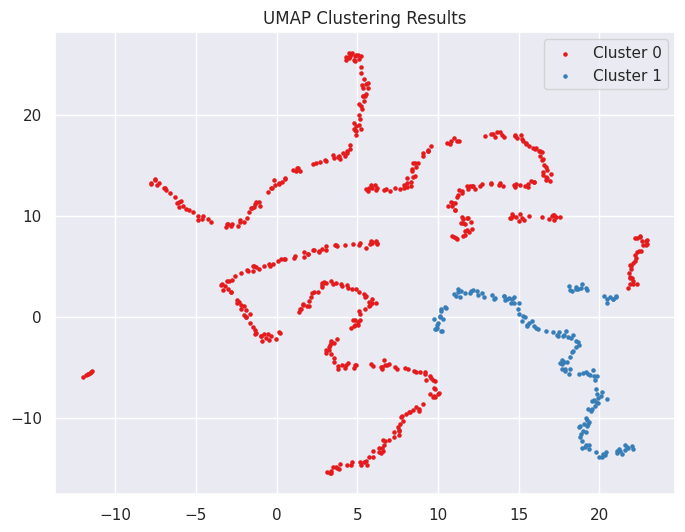

In [ ]:
df = embendings
df = df.select_dtypes(include=[float, int])
df.columns = df.columns.astype(str)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels and add them to the original data
labels = pd.DataFrame(kmeans.labels_)

import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

df = embendings


df.columns = df.columns.astype(str)

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Apply UMAP to the numeric columns
umap_model = umap.UMAP(n_neighbors=8, min_dist=0.8, n_components=2)
umap_results = umap_model.fit_transform(numeric_cols)


# # plt.scatter(umap_results[:, 0], umap_results[:, 1], c=labels, s = 5)
# plt.scatter(umap_results[:, 0], umap_results[:, 1], s = 5)
# plt.title('UMAP Clustering Results')
# plt.show()

palette = sns.color_palette('Set1', n_colors=len(umap_df['Cluster'].unique()))

# Plot the UMAP results with different colors for each cluster
for cluster, color in zip(umap_df['Cluster'].unique(), palette):
    cluster_data = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(cluster_data['UMAP 1'], cluster_data['UMAP 2'], color=color, label=f'Cluster {cluster}', s=5)

plt.title('UMAP Clustering Results')
plt.legend()
plt.show();

# **DBSCAN**

In [ ]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df = embendings

df.columns = df.columns.astype(str)

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Apply UMAP to the numeric columns
umap_model = umap.UMAP(n_neighbors=8, min_dist=0.8, n_components=2)
umap_results = umap_model.fit_transform(numeric_cols)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(numeric_cols)

# Create a dataframe with the UMAP results and cluster labels
umap_df = pd.DataFrame({'UMAP 1': umap_results[:, 0], 'UMAP 2': umap_results[:, 1], 'Cluster': labels})

# Generate a color palette for the clusters
palette = sns.color_palette('Set1', n_colors=len(umap_df['Cluster'].unique()))

# Plot the UMAP results with different colors for each cluster
for cluster, color in zip(umap_df['Cluster'].unique(), palette):
    cluster_data = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(cluster_data['UMAP 1'], cluster_data['UMAP 2'], color=color, label=f'Cluster {cluster}', s=5)

plt.title('UMAP Clustering Results')
plt.legend()
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df = embendings

df.columns = df.columns.astype(str)
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
umap_model = umap.UMAP(n_neighbors=8, min_dist=0.8, n_components=2)
umap_results = umap_model.fit_transform(numeric_cols)
linkage_matrix = linkage(numeric_cols, method='ward')
num_clusters = 12
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
umap_df = pd.DataFrame({'UMAP 1': umap_results[:, 0], 'UMAP 2': umap_results[:, 1], 'Cluster': clusters})
unique_clusters = umap_df['Cluster'].unique()
plt.figure(figsize=(10, 8))
for cluster in unique_clusters:
    cluster_data = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(cluster_data['UMAP 1'], cluster_data['UMAP 2'], s=5, label=f'Cluster {cluster}')
plt.title('UMAP Clustering Results')
plt.legend()
plt.show()

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



In [ ]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

df = embendings

df.columns = df.columns.astype(str)


numeric_cols = df.select_dtypes(include=['float64', 'int64'])


umap_model = umap.UMAP(n_neighbors=8, min_dist=0.8, n_components=2)
umap_results = umap_model.fit_transform(numeric_cols)


num_clusters = 7
spectral_model = SpectralClustering(n_clusters=num_clusters)
clusters = spectral_model.fit_predict(numeric_cols)

umap_df = pd.DataFrame({'UMAP 1': umap_results[:, 0], 'UMAP 2': umap_results[:, 1], 'Cluster': clusters})


unique_clusters = umap_df['Cluster'].unique()

colors = plt.cm.get_cmap('tab10', len(unique_clusters))

plt.figure(figsize=(10, 8))
for cluster in unique_clusters:
    cluster_data = umap_df[umap_df['Cluster'] == cluster]
    plt.scatter(cluster_data['UMAP 1'], cluster_data['UMAP 2'], s=5, c=colors(cluster), label=f'Cluster {cluster}')
plt.title('UMAP Clustering Results')
plt.legend()
plt.show()


In [ ]:
umap_df